In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [5]:
data = pd.read_csv('../../Data/Assignment_dataset.csv')

In [6]:
data.head()

,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
0,2,1,2824.802093,2530.517100,2717.842544,4
1,1,1,908.538051,1371.403348,1480.603380,2
2,1,0,4264.296027,4085.271732,4433.111426,4
3,2,1,650.809883,1537.163058,1002.764724,0
4,2,1,743.972385,1580.194147,992.426731,0


In [7]:
data.columns

Index(['Categorical_1', 'Categorical_2', 'Feature_1', 'Feature_2', 'Feature_3',
       'Label'],
      dtype='object')

In [8]:
categorical_features = []
continuous_features = []
for feature in data.columns:
    if feature == 'Label':
        classes = np.unique(data['Label'])
    if data[feature].dtype in ['int32' , 'int64']:
        categorical_features.append(feature)
    else:
        data[feature] = (data[feature]-data[feature].min())/(data[feature].max() - data[feature].min())
        continuous_features.append(feature)

print("Classes :", classes)
print("Catgeorical features :",categorical_features)
print("Continuous features :",continuous_features)

Classes : [0 1 2 3 4]
Catgeorical features : ['Categorical_1', 'Categorical_2', 'Label']
Continuous features : ['Feature_1', 'Feature_2', 'Feature_3']


In [9]:
np.random.seed(42)
train_data, test_data = train_test_split(data, test_size = 0.1)

train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
train_data.head()

,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
0,0,1,0.256323,0.007947,0.215542,1
1,0,0,0.085531,0.156081,0.148142,3
2,2,0,0.785842,0.739545,0.751448,4
3,1,0,0.071659,0.159907,0.147483,3
4,0,1,0.137902,0.181760,0.178699,0


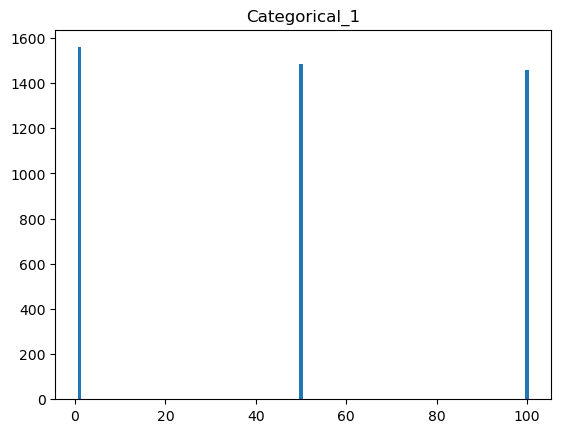

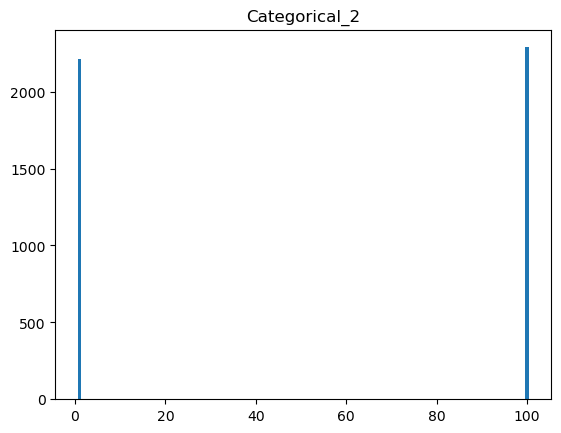

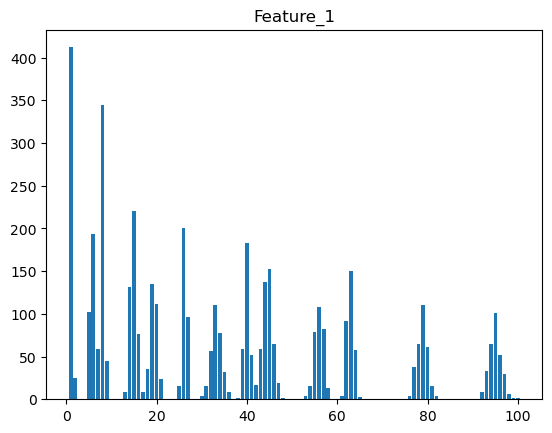

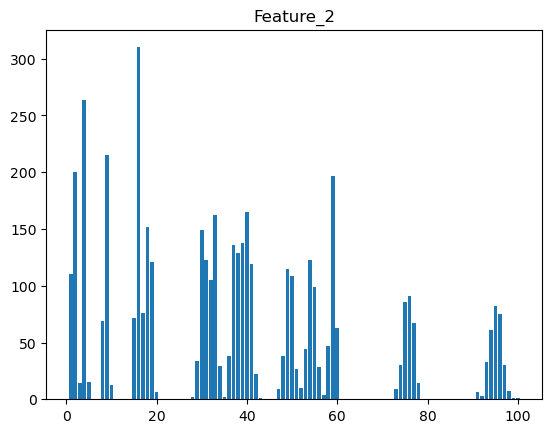

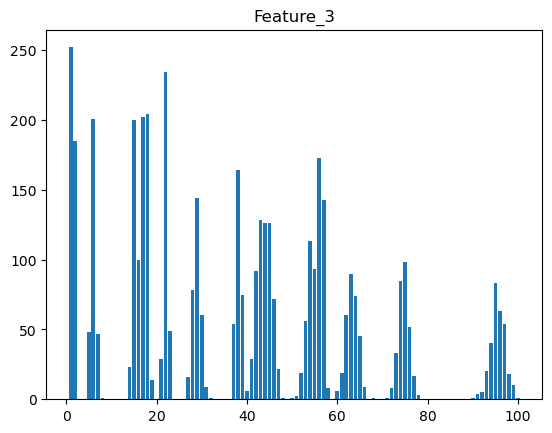

In [10]:
def plot_feature_bar_graph(data,feature,num_bins):
    bins = np.linspace(data[feature].min(), data[feature].max(), num_bins)
    bins, count = np.unique(np.digitize(data[feature],bins), return_counts = True)

    plt.title(feature)
    plt.bar(bins, count)
    plt.show()

for feature in data.columns:
    if feature != 'Label':
        plot_feature_bar_graph(train_data, feature, 100)

In [11]:
# Calculate pooled covariance matrix

pool_cov = np.zeros((len(data.columns)-1, len(data.columns)-1))

for cls in classes:
    train_data_cls = train_data[train_data['Label'] == cls]
    train_data_cls = train_data_cls.reset_index(drop = True)
    mean = np.mean(train_data_cls.values, axis = 0).reshape(-1,1)[:-1]
    for i in range(len(train_data_cls)):
        x_i = train_data_cls.iloc[i].values.reshape(-1,1)[:-1]
        pool_cov += np.dot((x_i-mean),(x_i-mean).T)
pool_cov /= (len(train_data)-len(classes))
pool_cov_inv = np.linalg.inv(pool_cov)

In [12]:
def discriminant(x, pool_cov_inv, data, cls):
    mean = np.mean(train_data_cls.values, axis = 0).reshape(-1,1)[:-1]
    term1 = np.dot(np.dot(x.T, pool_cov_inv), mean)
    term2 = -0.5*np.dot(np.dot(mean.T, pool_cov_inv), mean)
    prior_prob = len(data[data['Label']==cls].values)/len(data.values)

    return term1 + term2 + prior_prob

In [13]:
accuracy = 0
for i in range(len(test_data)):
    row = test_data.iloc[i]
    x = row.values[:-1]
    predictions = []
    for class_ in classes:   
        predictions.append(discriminant(x, pool_cov_inv, test_data, class_))
    class_pred = np.argmax(predictions)
    if class_pred == row['Label']:
        accuracy += 1

print("Accuracy of LDA :", 100*accuracy/len(test_data), "%")

Accuracy of LDA : 24.0 %
